In [2]:
pwd

'C:\\Users\\Abhinaba Chakraborti'

In [3]:
import pandas as pd

data = pd.read_csv("googleplaystore.csv")

In [4]:
null_counts = data.isnull().sum()

In [5]:
data.dropna(inplace=True)

In [10]:
# Convert Size column to numeric
data['Size'] = data['Size'].apply(lambda x: float(x[:-1]) * 1000 if 'M' in x else (float(x[:-1]) if x[:-1].isdigit() else -1))


In [11]:
# Convert Reviews column to numeric
data['Reviews'] = data['Reviews'].astype(int)
# Convert Installs column to numeric
data['Installs'] = data['Installs'].apply(lambda x: int(x[:-1].replace(',', '')) if '+' in x else int(x.replace(',', '')))
# Convert Price column to numeric
data['Price'] = data['Price'].apply(lambda x: float(x[1:]) if '$' in x else 0)

In [13]:
# Drop rows with rating outside the range [1, 5]
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]
# Drop rows where reviews are greater than installs
data = data[data['Reviews'] <= data['Installs']]
# Drop rows with price greater than 0 for free apps
data = data[(data['Type'] == 'Free') | (data['Price'] == 0)]

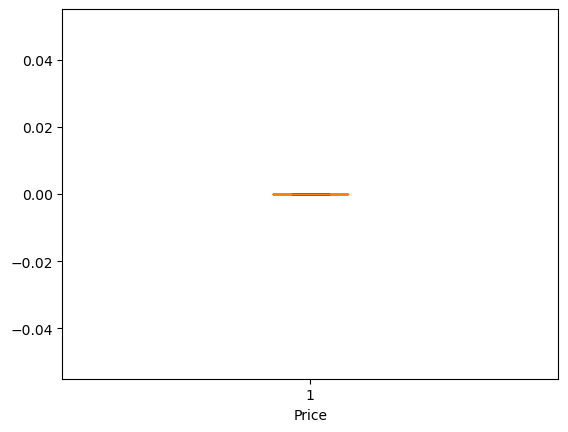

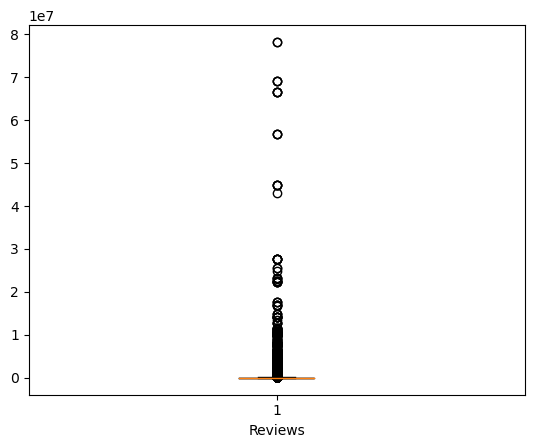

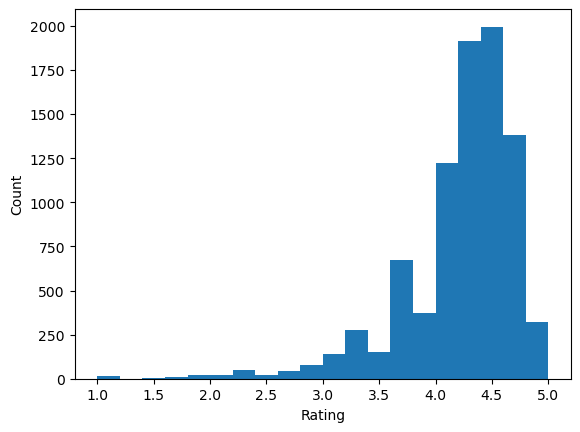

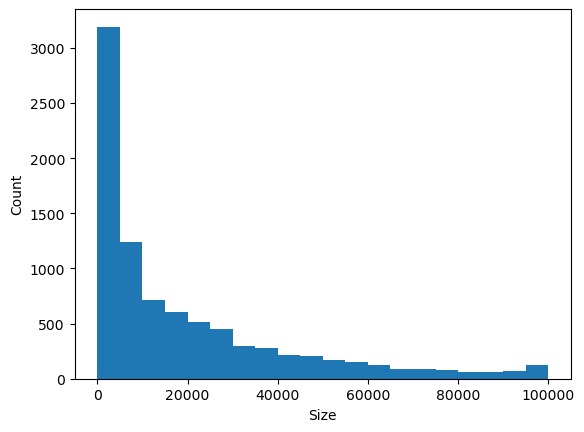

In [14]:
import matplotlib.pyplot as plt

# Boxplot for Price
plt.boxplot(data['Price'])
plt.xlabel('Price')
plt.show()

# Boxplot for Reviews
plt.boxplot(data['Reviews'])
plt.xlabel('Reviews')
plt.show()

# Histogram for Rating
plt.hist(data['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Histogram for Size
plt.hist(data['Size'], bins=20)
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [15]:
# Drop records with very high prices (e.g., $200)
data = data[data['Price'] < 200]
# Drop records with more than 2 million reviews
data = data[data['Reviews'] <= 2_000_000]
# Drop records with extremely high installs (e.g., top 1%)
install_threshold = data['Installs'].quantile(0.99)
data = data[data['Installs'] <= install_threshold]

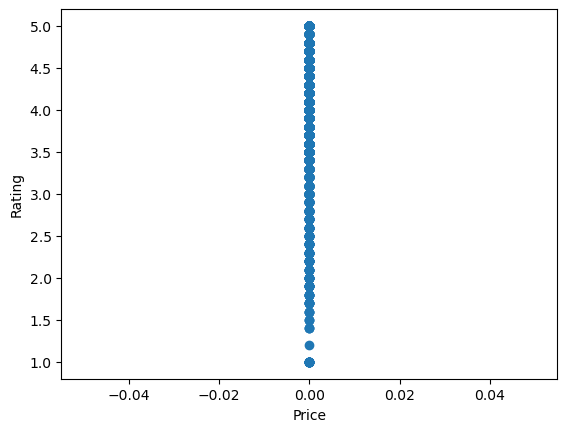

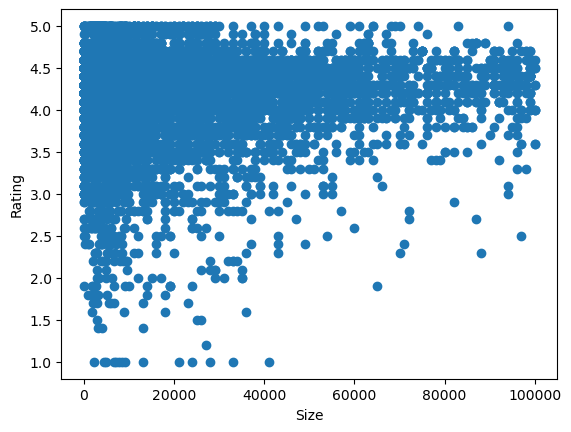

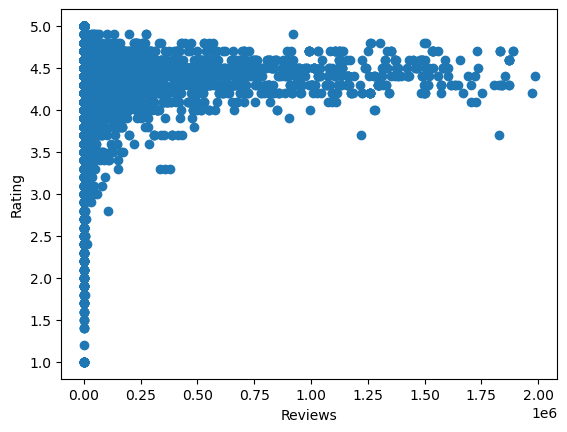

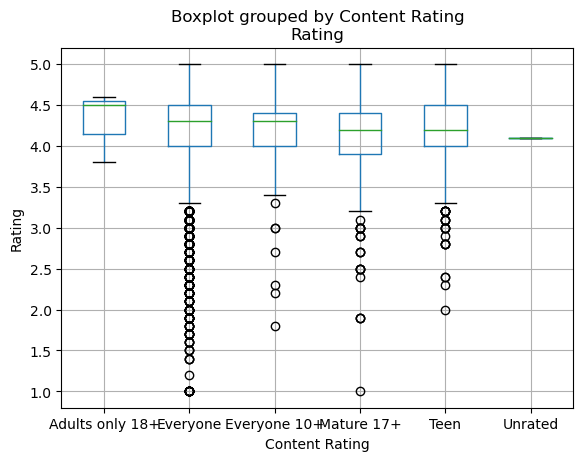

<AxesSubplot:title={'center':'Rating'}, xlabel='Category'>

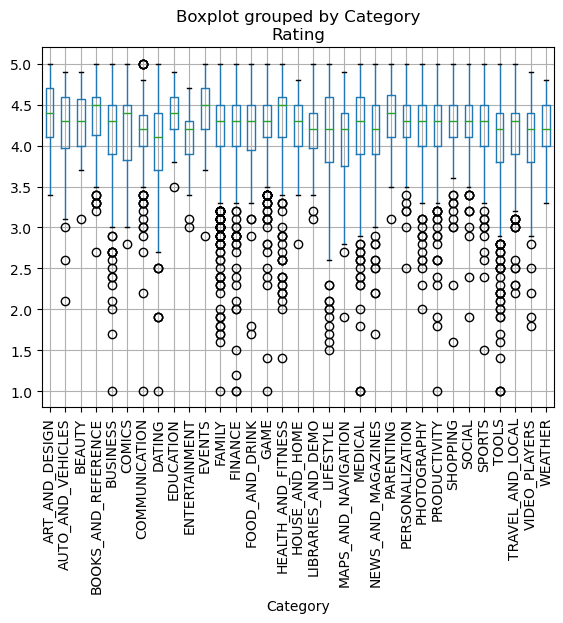

In [17]:
# Scatter plot for Rating vs. Price
plt.scatter(data['Price'], data['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Scatter plot for Rating vs. Size
plt.scatter(data['Size'], data['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

# Scatter plot for Rating vs. Reviews
plt.scatter(data['Reviews'], data['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

# Boxplot for Rating vs. Content Rating
data.boxplot(column='Rating', by='Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()

# Boxplot for Rating vs. Category
data.boxplot('Rating', by='Category', rot=90)